### This is Alli's work 

In [1]:
# Dependencies
import pandas as pd 
import numpy as np 
import scipy.stats as stats
from matplotlib import pyplot as plt
import requests
import json

# LATER: Import Keys
# from config import ...
# CURRENT: add your key here 
api_key = "ADD YOUR KEY"

# import any files needed 
#NONE YET

# read files
# NONE YET

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"




In [2]:
# Hospitals API Call 
# parameters
target_coordinates = "30.2672 ,-97.7431"
target_search = "Emergency Room Hospital "
target_radius = 20000
target_type = "Hospital"
# set up parameters 
hospital_params = {
     "location": target_coordinates,
     "keyword": target_search,
     "radius": target_radius,
     "type": target_type,
     "key": api_key
}
hospital_response = requests.get(base_url, params=hospital_params)
hospital_response.json()


{'html_attributions': [],
 'next_page_token': 'CsQCOQEAAEdvm97mXRCucXdziZxSnztXnwrtVVwZWVwZrGE9y0vZmBJsmzhbIjP08CQqYuyH9eGf03x3jhEaNGDv9GpgRWpYVGtrvyqiKg2cz9TeV2vqPZAzCoKupvSLo8cJrTbxWOZrPdUNNvycp8O_G7ZL0wGRGH-2cIE1NpgCH1yc4ldv7IyHU2MrX52yalzjicSC1Hq1wYJ5XIWrUtv4FLa10y6Ruj1mge4CCDRvsDTfZ40ktorZHKEsXofxp0s6zBO9Qgt2dY1heQwneWA2Ew_FDh-FU9md0XC9uy4hqNSu5F6UHTWSwyOFomYaN1GOgStY4MuO-qe3iMhgcuCrBhQ13gE9i7fnuoPk279K-B-tV2GqHIrOSzYyduiQakh6CMSbaG8p0yoWgimDVZFMUhLiIKtUJIMWO5o6qvzEcBJhC0vxEhB7uj1b_2bF3sfCa4_mHgWRGhTteBWb9lNTQNIGISRw7lR5MCnZ2Q',
 'results': [{'geometry': {'location': {'lat': 30.3059344, 'lng': -97.7412061},
    'viewport': {'northeast': {'lat': 30.30720687989272,
      'lng': -97.73999232010728},
     'southwest': {'lat': 30.30450722010727, 'lng': -97.74269197989273}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/doctor-71.png',
   'id': '46a62b66bee2be4e970145a25faaefa8b14e7458',
   'name': 'Heart Hospital of Austin',
   'opening_hours': {'open_now': True},
   '

In [15]:
#Hospitals results

#get results in JSON format
hospitals = hospital_response.json().get('results')
#Iterate over the result and return the fields we need
print(f'Hospitals & ERs')    
    
#Lists of fields we need
names = list()
addresses = list()
lats = list()
longs = list()
ratings = list()
place_ids = list()

# Iterate and return values for DF and printing
for p in hospitals:
    #df results
    names.append(p.get('name'))
    addresses.append(p.get('vicinity'))
    lats.append(p.get('geometry').get('location').get('lat'))
    longs.append(p.get('geometry').get('location').get('lng'))
    ratings.append(p.get('rating'))
    place_ids.append(p.get('place_id'))
    
    #print results
    name = p.get('name')
    address = p.get('vicinity')
    rating = p.get('rating')
    lat = p.get('geometry').get('location').get('lat') 
    loc = p.get('geometry').get('location')
    long = p.get('geometry').get('location').get('lng')
    place_id = p.get('place_id')
    geo = p.get('geometry', {}).get('location', {})   
    
    print("----------------------------")
    print(f'Name: {name},Lat: {lat}, Long: {long}, Place ID: {place_id}, Address: {address},Rating: {rating} ')  

#summary DataFrame 
hospital_summary = pd.DataFrame ({'Name': names,
                'Lat': lats,
                'Long': longs, 
                'Id': place_ids,
                'Address': addresses, 
                'Rating': ratings})

hospital_summary

       

# hospital_summary.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
# hospital_summary
    
    
 

Hospitals & ERs
----------------------------
Name: Heart Hospital of Austin,Lat: 30.3059344, Long: -97.7412061, Place ID: ChIJ21hN8n3KRIYRcFnDZLVfRdw, Address: 3801 N Lamar Blvd, Austin,Rating: 4.1 
----------------------------
Name: Northwest Hills Surgical Hospital: Emergency Room,Lat: 30.3505033, Long: -97.7518024, Place ID: ChIJIV9EpQTLRIYRh1BoYp6AOuQ, Address: 6818 Austin Center Blvd, Austin,Rating: 0 
----------------------------
Name: Emergency Room - Ascension Seton Medical Center Austin,Lat: 30.3045193, Long: -97.7461972, Place ID: ChIJBx8ds4bKRIYRwhm9ceqdNvI, Address: 1201 W 38th St, Austin,Rating: 2.7 
----------------------------
Name: Dell Children's Medical Center of Central Texas Emergency Room,Lat: 30.3037835, Long: -97.7067943, Place ID: ChIJiRc6sAfKRIYRmOzVy1A6n6M, Address: 4900 Mueller Blvd, Austin,Rating: 2.8 
----------------------------
Name: The Hospital at Westlake Medical Center: Emergency Room,Lat: 30.2957479, Long: -97.82561869999999, Place ID: ChIJExNrRn41W4

,Name,Lat,Long,Id,Address,Rating
0,Heart Hospital of Austin,30.305934,-97.741206,ChIJ21hN8n3KRIYRcFnDZLVfRdw,"3801 N Lamar Blvd, Austin",4.1
1,Northwest Hills Surgical Hospital: Emergency Room,30.350503,-97.751802,ChIJIV9EpQTLRIYRh1BoYp6AOuQ,"6818 Austin Center Blvd, Austin",0.0
2,Emergency Room - Ascension Seton Medical Cente...,30.304519,-97.746197,ChIJBx8ds4bKRIYRwhm9ceqdNvI,"1201 W 38th St, Austin",2.7
3,Dell Children's Medical Center of Central Texa...,30.303784,-97.706794,ChIJiRc6sAfKRIYRmOzVy1A6n6M,"4900 Mueller Blvd, Austin",2.8
4,The Hospital at Westlake Medical Center: Emerg...,30.295748,-97.825619,ChIJExNrRn41W4YRfC4FiQ8BYAo,"5656 Bee Caves Rd, West Lake Hills",3.0
5,Emergency Room - Seton Northwest Hospital,30.405378,-97.743808,ChIJnx7nsYnMRIYRH-n47pyHAOs,"11113 Research Blvd, Austin",2.1
6,Arise Austin Medical Center: Emergency Room,30.270891,-97.795905,ChIJaf9xdshKW4YRny4bPyy-nO8,"3003 Bee Caves Rd, Austin",5.0
7,Dell Children's Medical Center of Central Texa...,30.303408,-97.706939,ChIJm8lJFQfKRIYR_nZHP3bBWww,"4900 Mueller Blvd, Austin",1.0
8,Austin Emergency Center - Mueller,30.301650,-97.698967,ChIJNfUvvZ7LRIYRlCZXFVa4XD8,"1801 E 51st St Bldg. H, Austin",4.9
9,Ascension Seton Medical Center Austin,30.305078,-97.746085,ChIJ44CyyYbKRIYRc59df6kDbQ4,"1201 W 38th St, Austin",3.3


In [4]:
# output file jic 
# hospital_summary.dtypes
# hospital_summary.to_csv("output.csv", index=False)

<BarContainer object of 20 artists>

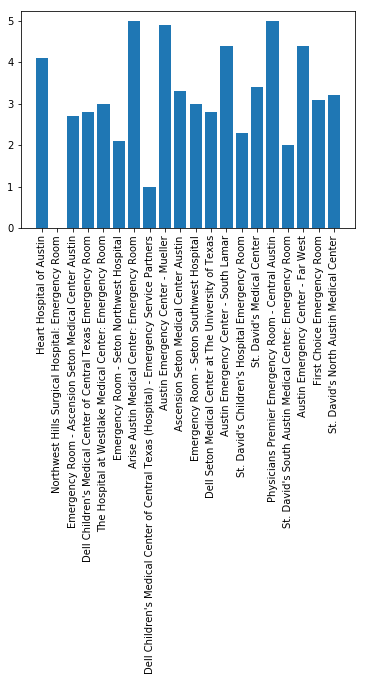

In [5]:
# Quick starter plot to check it works
plt.xticks(rotation=90)
plt.bar(hospital_summary['Name'],hospital_summary['Rating'])


In [6]:

# Assisted Living Facilities API Call 

alf_coordinates = "30.2672 ,-97.7431"
alf_search = "Assisted Living"
# possibility: alt alf searchs and merge?  
# alf_search = "55+ Active Senior Community"
alf_radius = 20000
alf_type = "Assisted Living"
# set up parameters 
alf_params = {
     "location": alf_coordinates,
     "keyword": alf_search,
     "radius": alf_radius,
     "type": alf_type,
     "key": api_key
}
alf_response = requests.get(base_url, params=alf_params)
alf_response.json()


{'html_attributions': [],
 'next_page_token': 'CsQCNwEAACGMP89F1ETD0fTzCh3ODZ_q-9GAa41z-TfnZaBpaiZD-IrfTyF6On-_KbbarZ2D1E3mkNBYzX9if1jc_KRWgkjGG1EOL7b54FXzG4AWOga-gxwOM_9XLksGtEvnI-_X3NsjpUtnHzITvGjYnSfh6Rqstq8mgWQxPiBRTx_9HW50C7umwtRNxt_ZOXA1oIxP_BAA9TqOUAp72FvhmxQWbmWvQIG5lSeV80pS_S7_JbgM5KfuXYMfQIUTUUoTyGJT-nYjthLwvX7zODlorlBUrnYwRzT8lvaX52rZVEMeRsAAXLy2Ppln2rPC6AXZaLSzKL19bfv4mCk5YyFTIMrSh7N6RJLyy4-bmKJw_j1wXiC3aj5X110cRKGZUUMTePsdC89vAfmgRRA2R2ujvvQFQAjybc-EqtBkkFa-EtczTotYEhAbGaVG9BH0kmLKgmorAGdoGhRgd5_cJRS-uRBy3aXF4IEk0GEpJQ',
 'results': [{'geometry': {'location': {'lat': 30.3133579, 'lng': -97.7341465},
    'viewport': {'northeast': {'lat': 30.31479292989272,
      'lng': -97.73297512010727},
     'southwest': {'lat': 30.31209327010728, 'lng': -97.73567477989272}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/generic_business-71.png',
   'id': '601e9e644eaa57d068ee706a93119649ae40191b',
   'name': 'The Village at The Triangle',
   'opening_hours': {'open_now'

In [14]:
# ALF Results
alfs = alf_response.json().get('results')
#Iterate over the result and return the fields we need
print(f'ALFs')  

#lists of each field we need 
names = list()
addresses = list()
lats = list()
longs = list()
ratings = list()
place_ids = list()

# iterate
for a in alfs:
    #df results
    names.append(a.get('name'))
    addresses.append(a.get('vicinity'))
    lats.append(a.get('geometry').get('location').get('lat'))
    longs.append(a.get('geometry').get('location').get('lng'))
    ratings.append(a.get('rating'))
    place_ids.append(a.get('place_id'))
    
    #print variables 
    name = a.get('name')
    address = a.get('vicinity')
    rating = a.get('rating')
    lat = a.get('geometry').get('location').get('lat')
    long = a.get('geometry').get('location').get('lng')
    place_id = a.get('place_id')
    geo = a.get('geometry', {}).get('location', {})
    
    print("----------------------------")
    print(f'Name: {name},Lat: {lat}, Long: {long}, Place ID: {place_id}, Address: {address},Rating: {rating} ')

#summary frame
alf_summary = pd.DataFrame ({'Name': names,
                'Lat': lats,
                'Long': longs, 
                'Id': place_ids,
                'Address': addresses, 
                'Rating': ratings})

alf_summary  
  


ALFs
----------------------------
Name: The Village at The Triangle,Lat: 30.3133579, Long: -97.7341465, Place ID: ChIJaVrQ-WTKRIYR0lEg-VRkQRA, Address: 4517 Triangle Ave, Austin,Rating: 4.9 
----------------------------
Name: Southern Hospitality Home,Lat: 30.3229337, Long: -97.7429865, Place ID: ChIJtfeWQPXKRIYRU0qws_Dk9Vk, Address: 5000 Shoalwood Ave, Austin,Rating: 5 
----------------------------
Name: Parsons House Austin,Lat: 30.3244573, Long: -97.6966468, Place ID: ChIJjW3GNfXJRIYR6AsP5IwOOPU, Address: 1130 Camino La Costa, Austin,Rating: 4 
----------------------------
Name: Brookdale Northwest Hills,Lat: 30.3424958, Long: -97.7689379, Place ID: ChIJIYmZvNjKRIYRn9g9mMA6_kk, Address: 5715 Mesa Dr, Austin,Rating: 4 
----------------------------
Name: Austin Supported Living Center,Lat: 30.3067611, Long: -97.7596052, Place ID: ChIJFRlgoZnKRIYRXOuynV9FN10, Address: 2203 W 35th St, Austin,Rating: 3.3 
----------------------------
Name: Oasis Senior Advisors Austin,Lat: 30.300459, Lon

,Name,Lat,Long,Id,Address,Rating
0,The Village at The Triangle,30.313358,-97.734146,ChIJaVrQ-WTKRIYR0lEg-VRkQRA,"4517 Triangle Ave, Austin",4.9
1,Southern Hospitality Home,30.322934,-97.742987,ChIJtfeWQPXKRIYRU0qws_Dk9Vk,"5000 Shoalwood Ave, Austin",5.0
2,Parsons House Austin,30.324457,-97.696647,ChIJjW3GNfXJRIYR6AsP5IwOOPU,"1130 Camino La Costa, Austin",4.0
3,Brookdale Northwest Hills,30.342496,-97.768938,ChIJIYmZvNjKRIYRn9g9mMA6_kk,"5715 Mesa Dr, Austin",4.0
4,Austin Supported Living Center,30.306761,-97.759605,ChIJFRlgoZnKRIYRXOuynV9FN10,"2203 W 35th St, Austin",3.3
5,Oasis Senior Advisors Austin,30.300459,-97.735347,ChIJX0PDvPLLRIYRflKvtLNpne4,"3710 Cedar St #281, Austin",5.0
6,Belmont Village Senior Living West Lake Hills,30.287426,-97.812960,ChIJs4k05ptKW4YRk0IaVnJ-fYY,"4310 Bee Caves Rd, Austin",3.9
7,Barton Hills Assisted Living,30.252569,-97.768689,ChIJ44aMtCC1RIYRFkROxW1rbe4,"1606 Nash Ave, Austin",4.3
8,Harper House Assisted Living,30.286358,-97.699224,ChIJoVw7ZeK1RIYRNCmi0JkZHwE,"2201 Greenwood Ave, Austin",0.0
9,Austin Adult Day Health Center,30.300459,-97.735347,ChIJtzKMuHjKRIYRZF-ZXUQ3IQE,"3710 Cedar St # 199, Austin",0.0


In [8]:
#output file jic 
# alf_summary.dtypes
# alf_summary.to_csv("output.csv", index=False)

<BarContainer object of 20 artists>

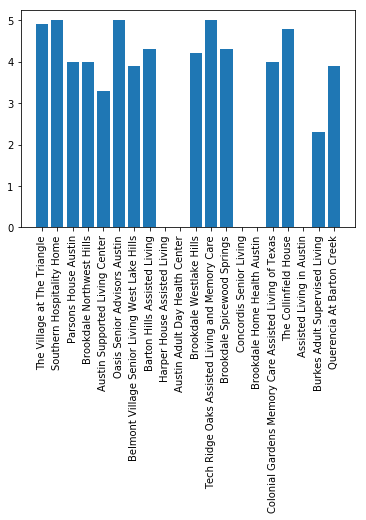

In [9]:
# Quick starter plot to check it works
plt.xticks(rotation=90)
plt.bar(alf_summary['Name'],alf_summary['Rating'])